<a href="https://colab.research.google.com/github/MDaniyalTariq/Emplyee-Monitoring-using-YOLO-V8/blob/main/Employee%20Monitoring%20Using%20Object%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jan 25 05:25:57 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:


import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


In [6]:
!pip install roboflow
!pip install pyresearch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.2 MB/s eta 0:00:00


In [5]:


from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

## Inference with Pre-trained COCO Model

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

NameError: name 'YOLO' is not defined

In [3]:
!mkdir /content/datasets
%cd /content/datasets


from roboflow import Roboflow
rf = Roboflow(api_key="3Pb5dthKLLkTxTwEegmv")
project = rf.workspace("employee-surveillance-qqqut").project("employee-surveillance-y8zbq")
version = project.version(6)
dataset = version.download("yolov8")












/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to employee-surveillance-6 in yolov8:: 100%|██████████| 844/844 [00:00<00:00, 8988.63it/s]


## Custom Training

In [8]:
%cd /content/datasets/employee-surveillance-6
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=70 imgsz=600 plots=True

/content/datasets/employee-surveillance-6
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

In [14]:
!ls /content/datasets/employee-surveillance-6/runs/detect/train5

args.yaml					    PR_curve.png	 train_batch1.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1737784496.d45baa249209.7650.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1380.jpg  val_batch1_pred.jpg
labels.jpg					    train_batch1381.jpg  weights
P_curve.png					    train_batch1382.jpg


/content


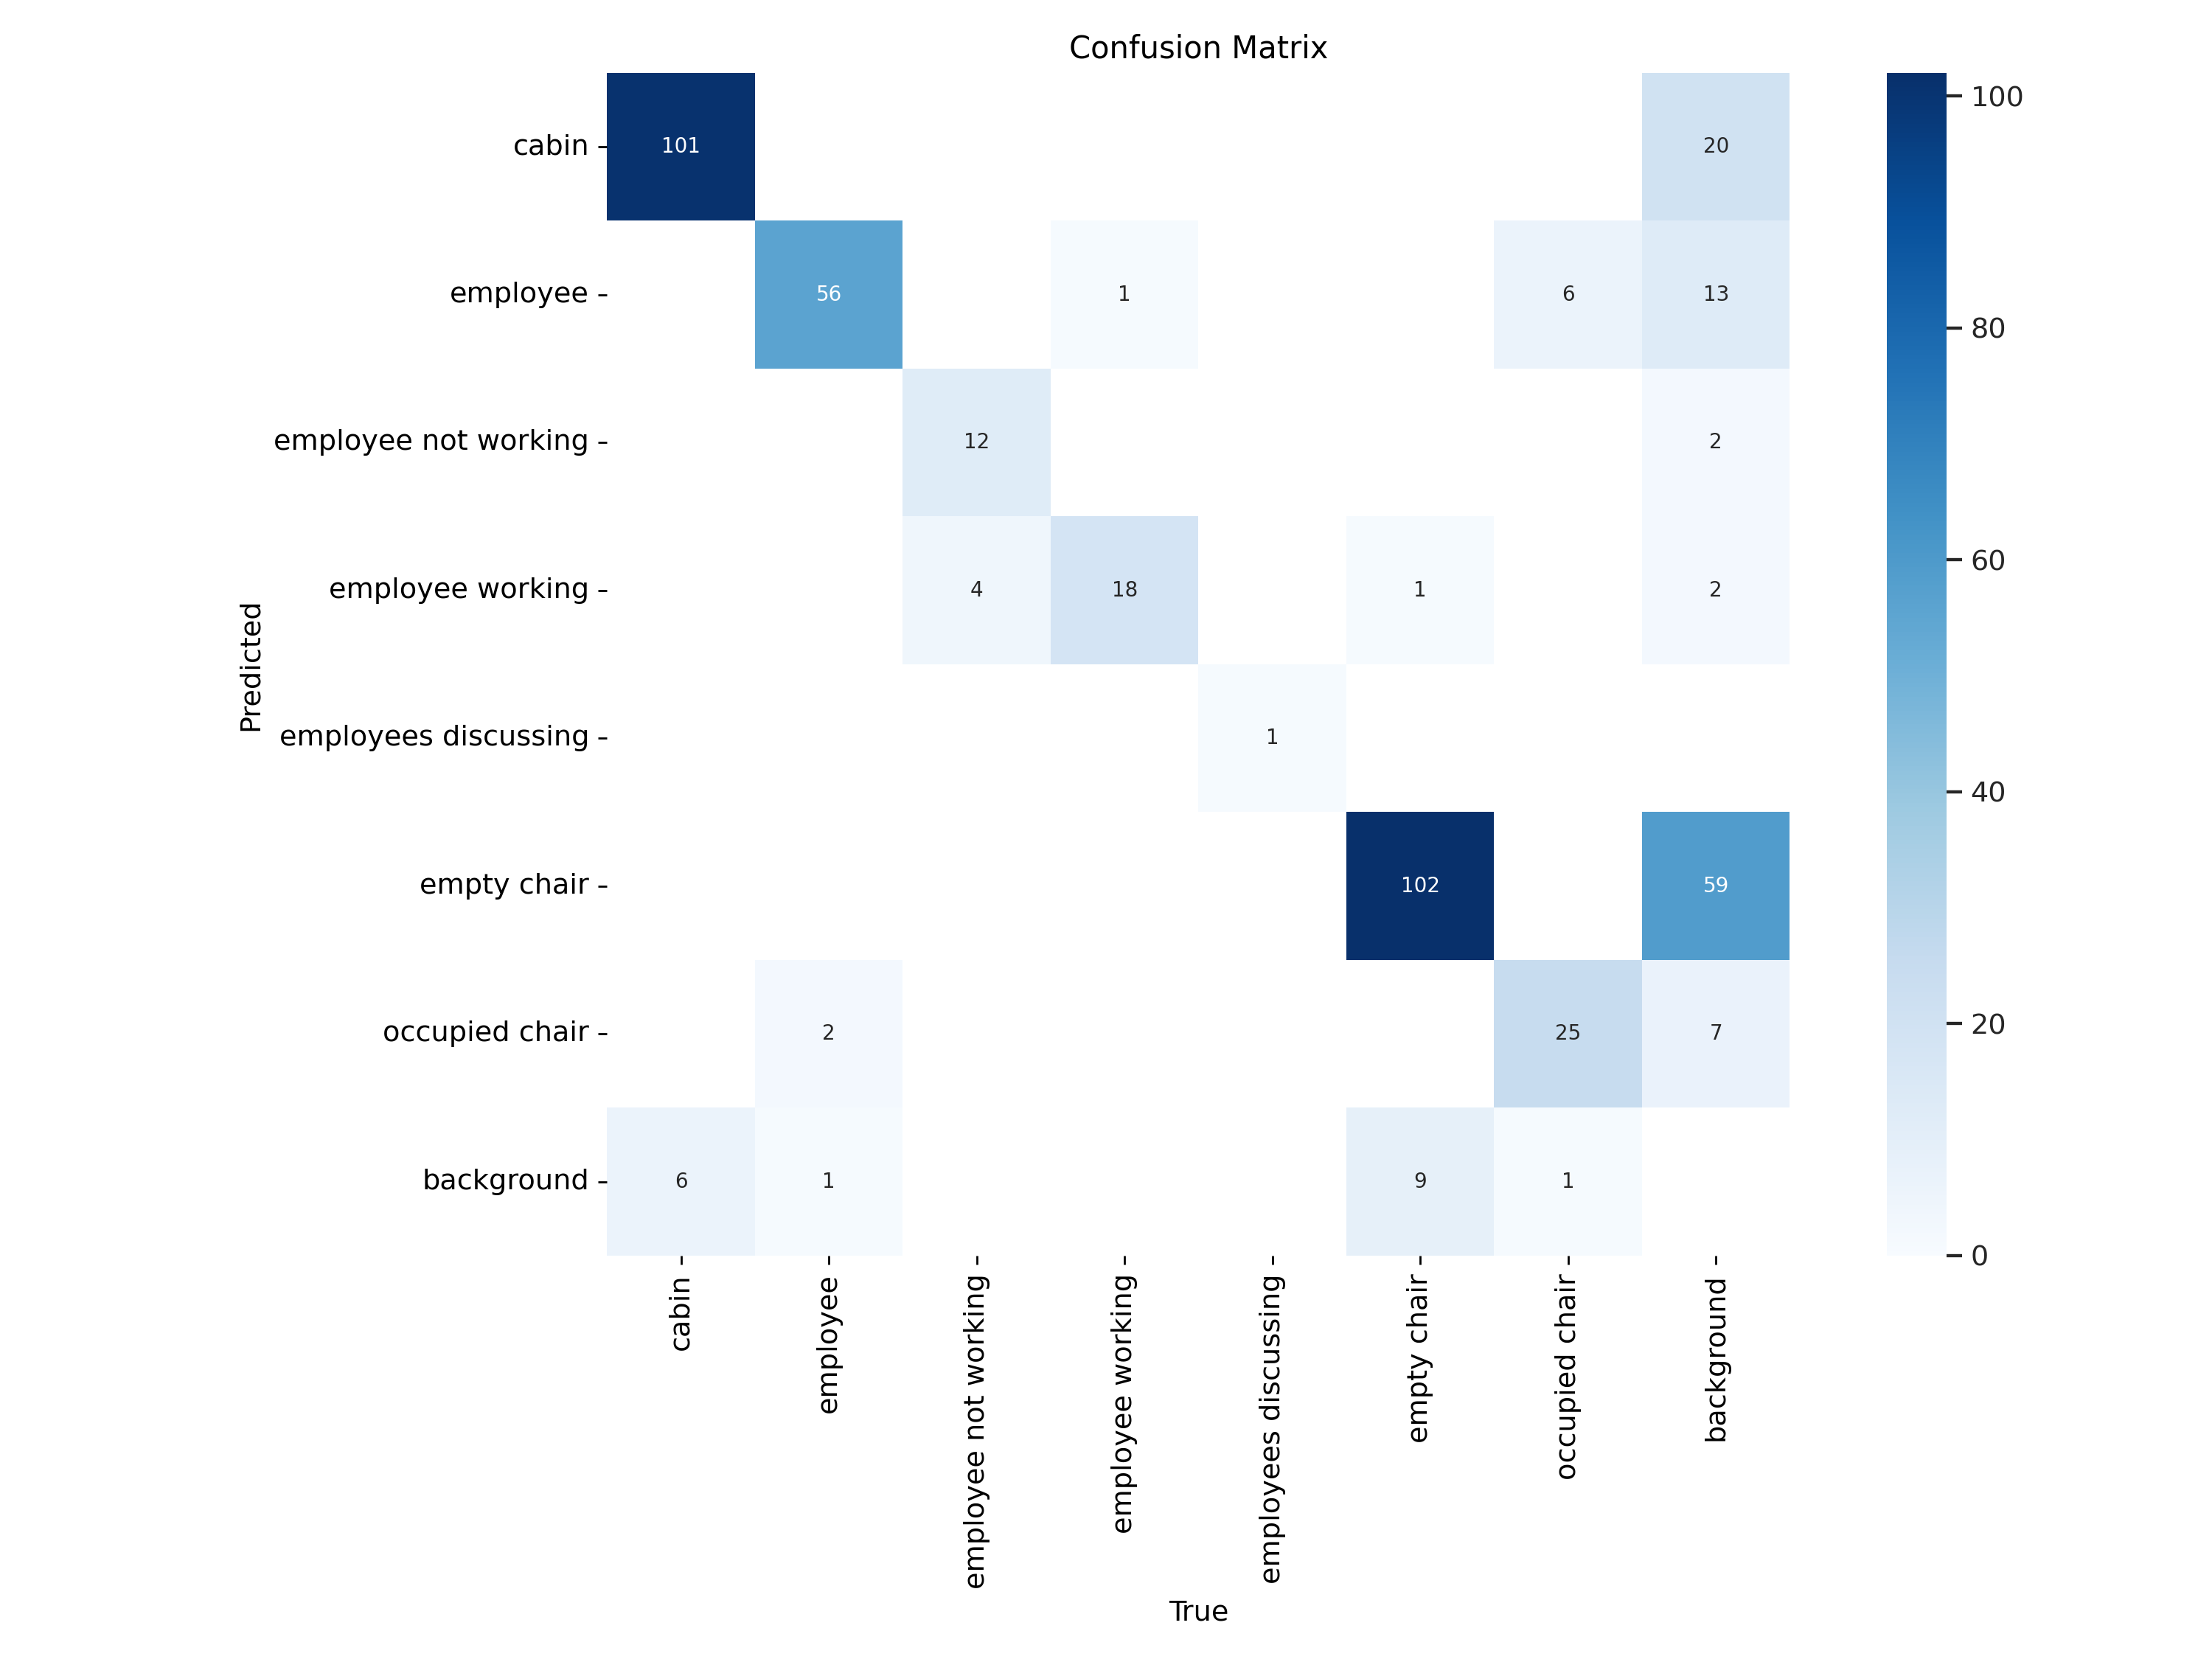

In [15]:
from IPython import get_ipython
from IPython.display import display, Image

get_ipython().run_line_magic('cd', '/content')
Image(filename=f'/content/datasets/employee-surveillance-6/runs/detect/train5/confusion_matrix.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content


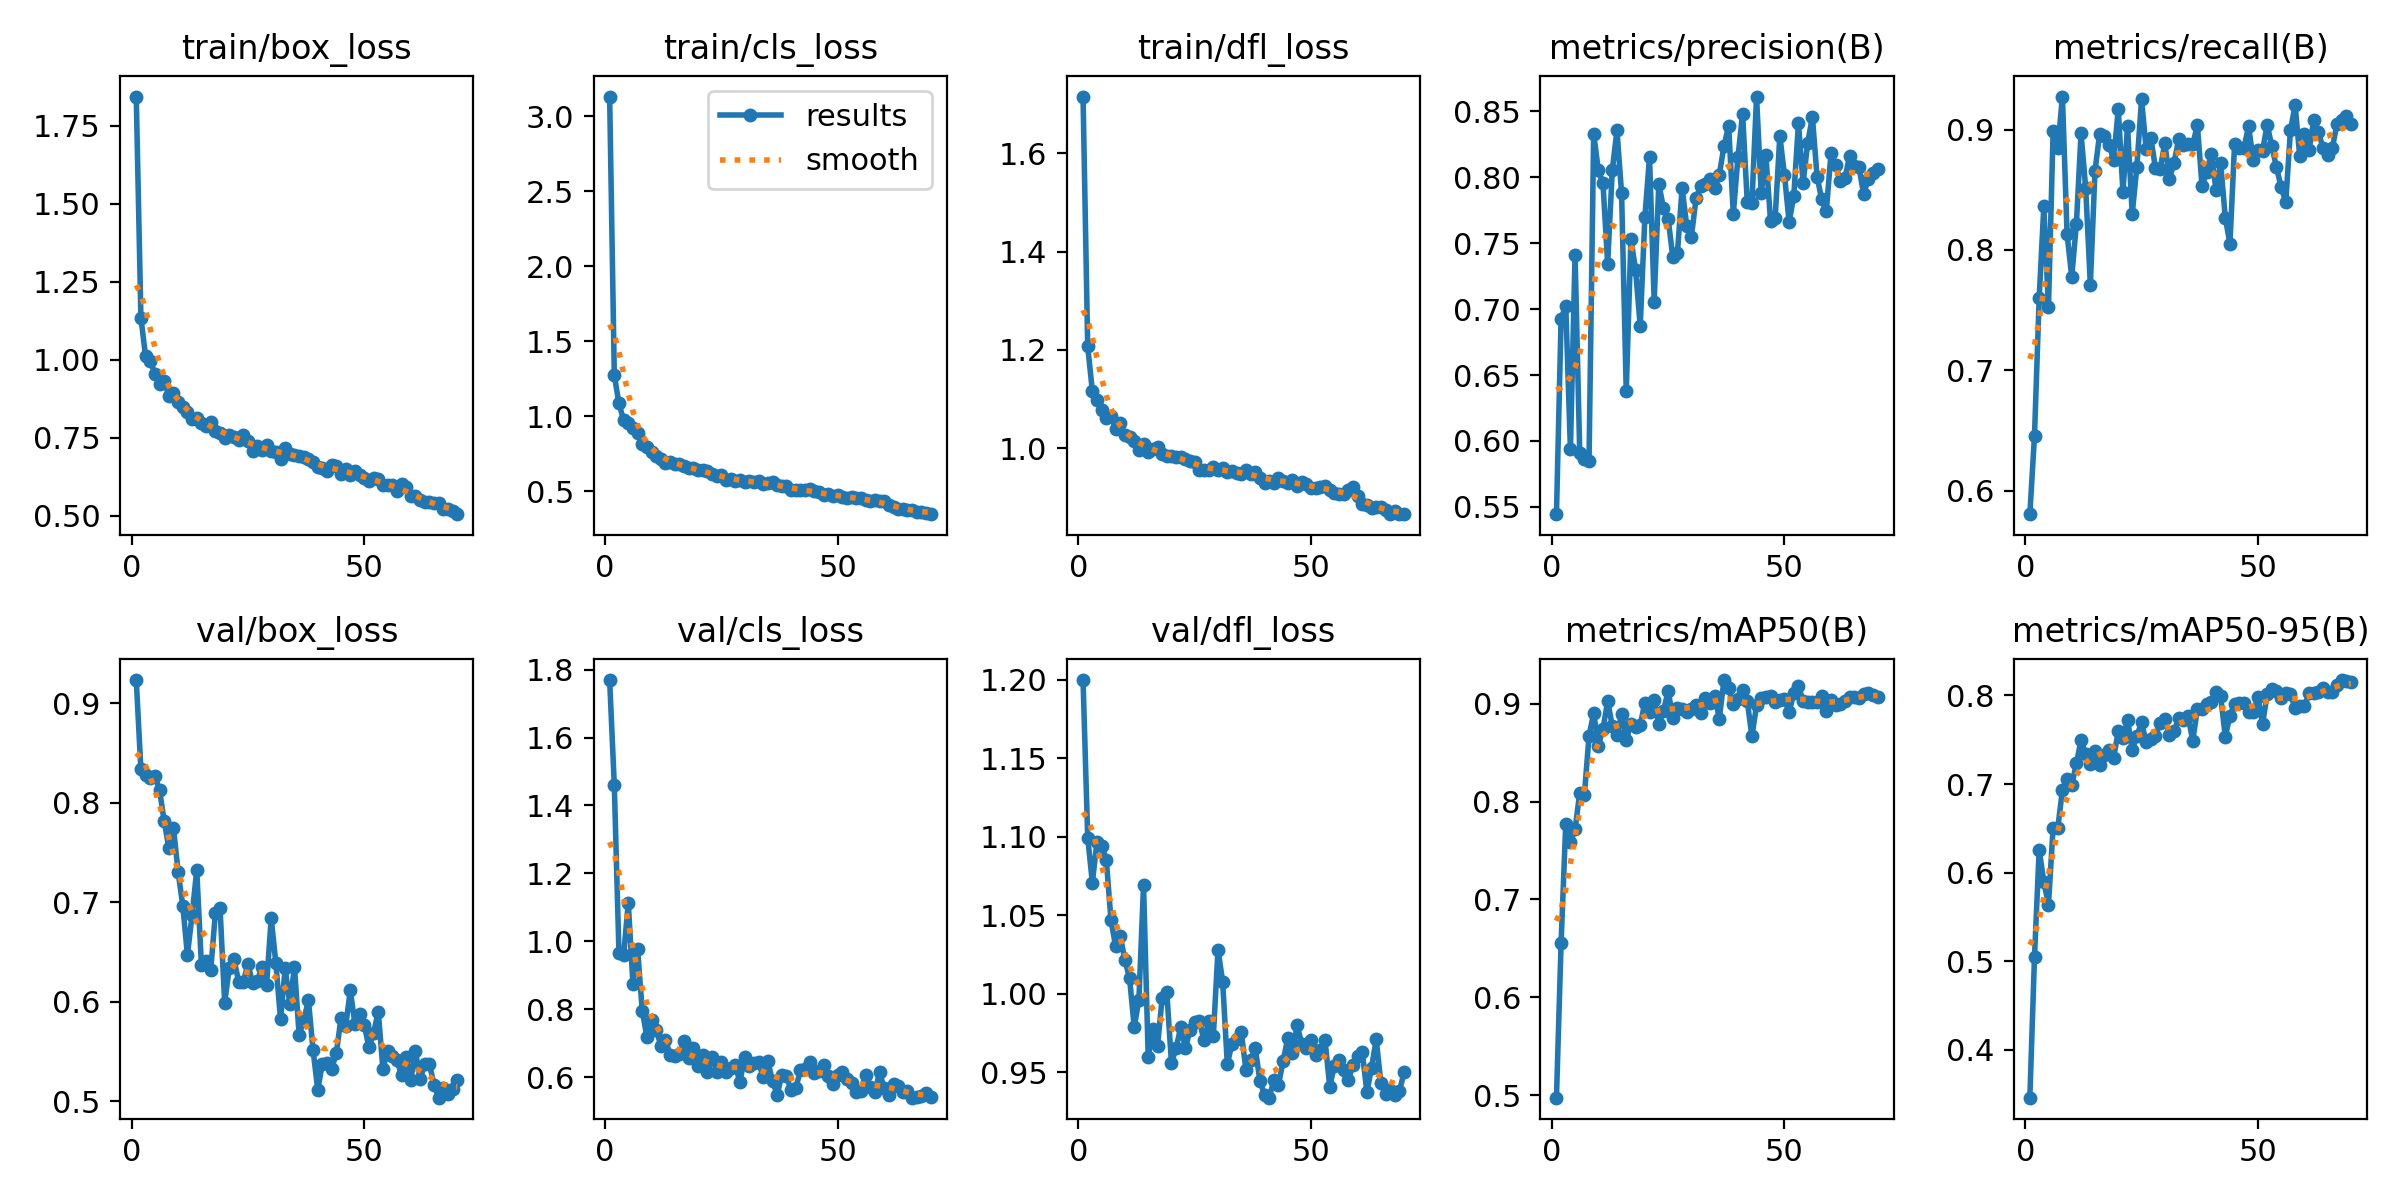

In [16]:
%cd {HOME}
Image(filename=f'/content/datasets/employee-surveillance-6/runs/detect/train5/results.png', width=600)

/content


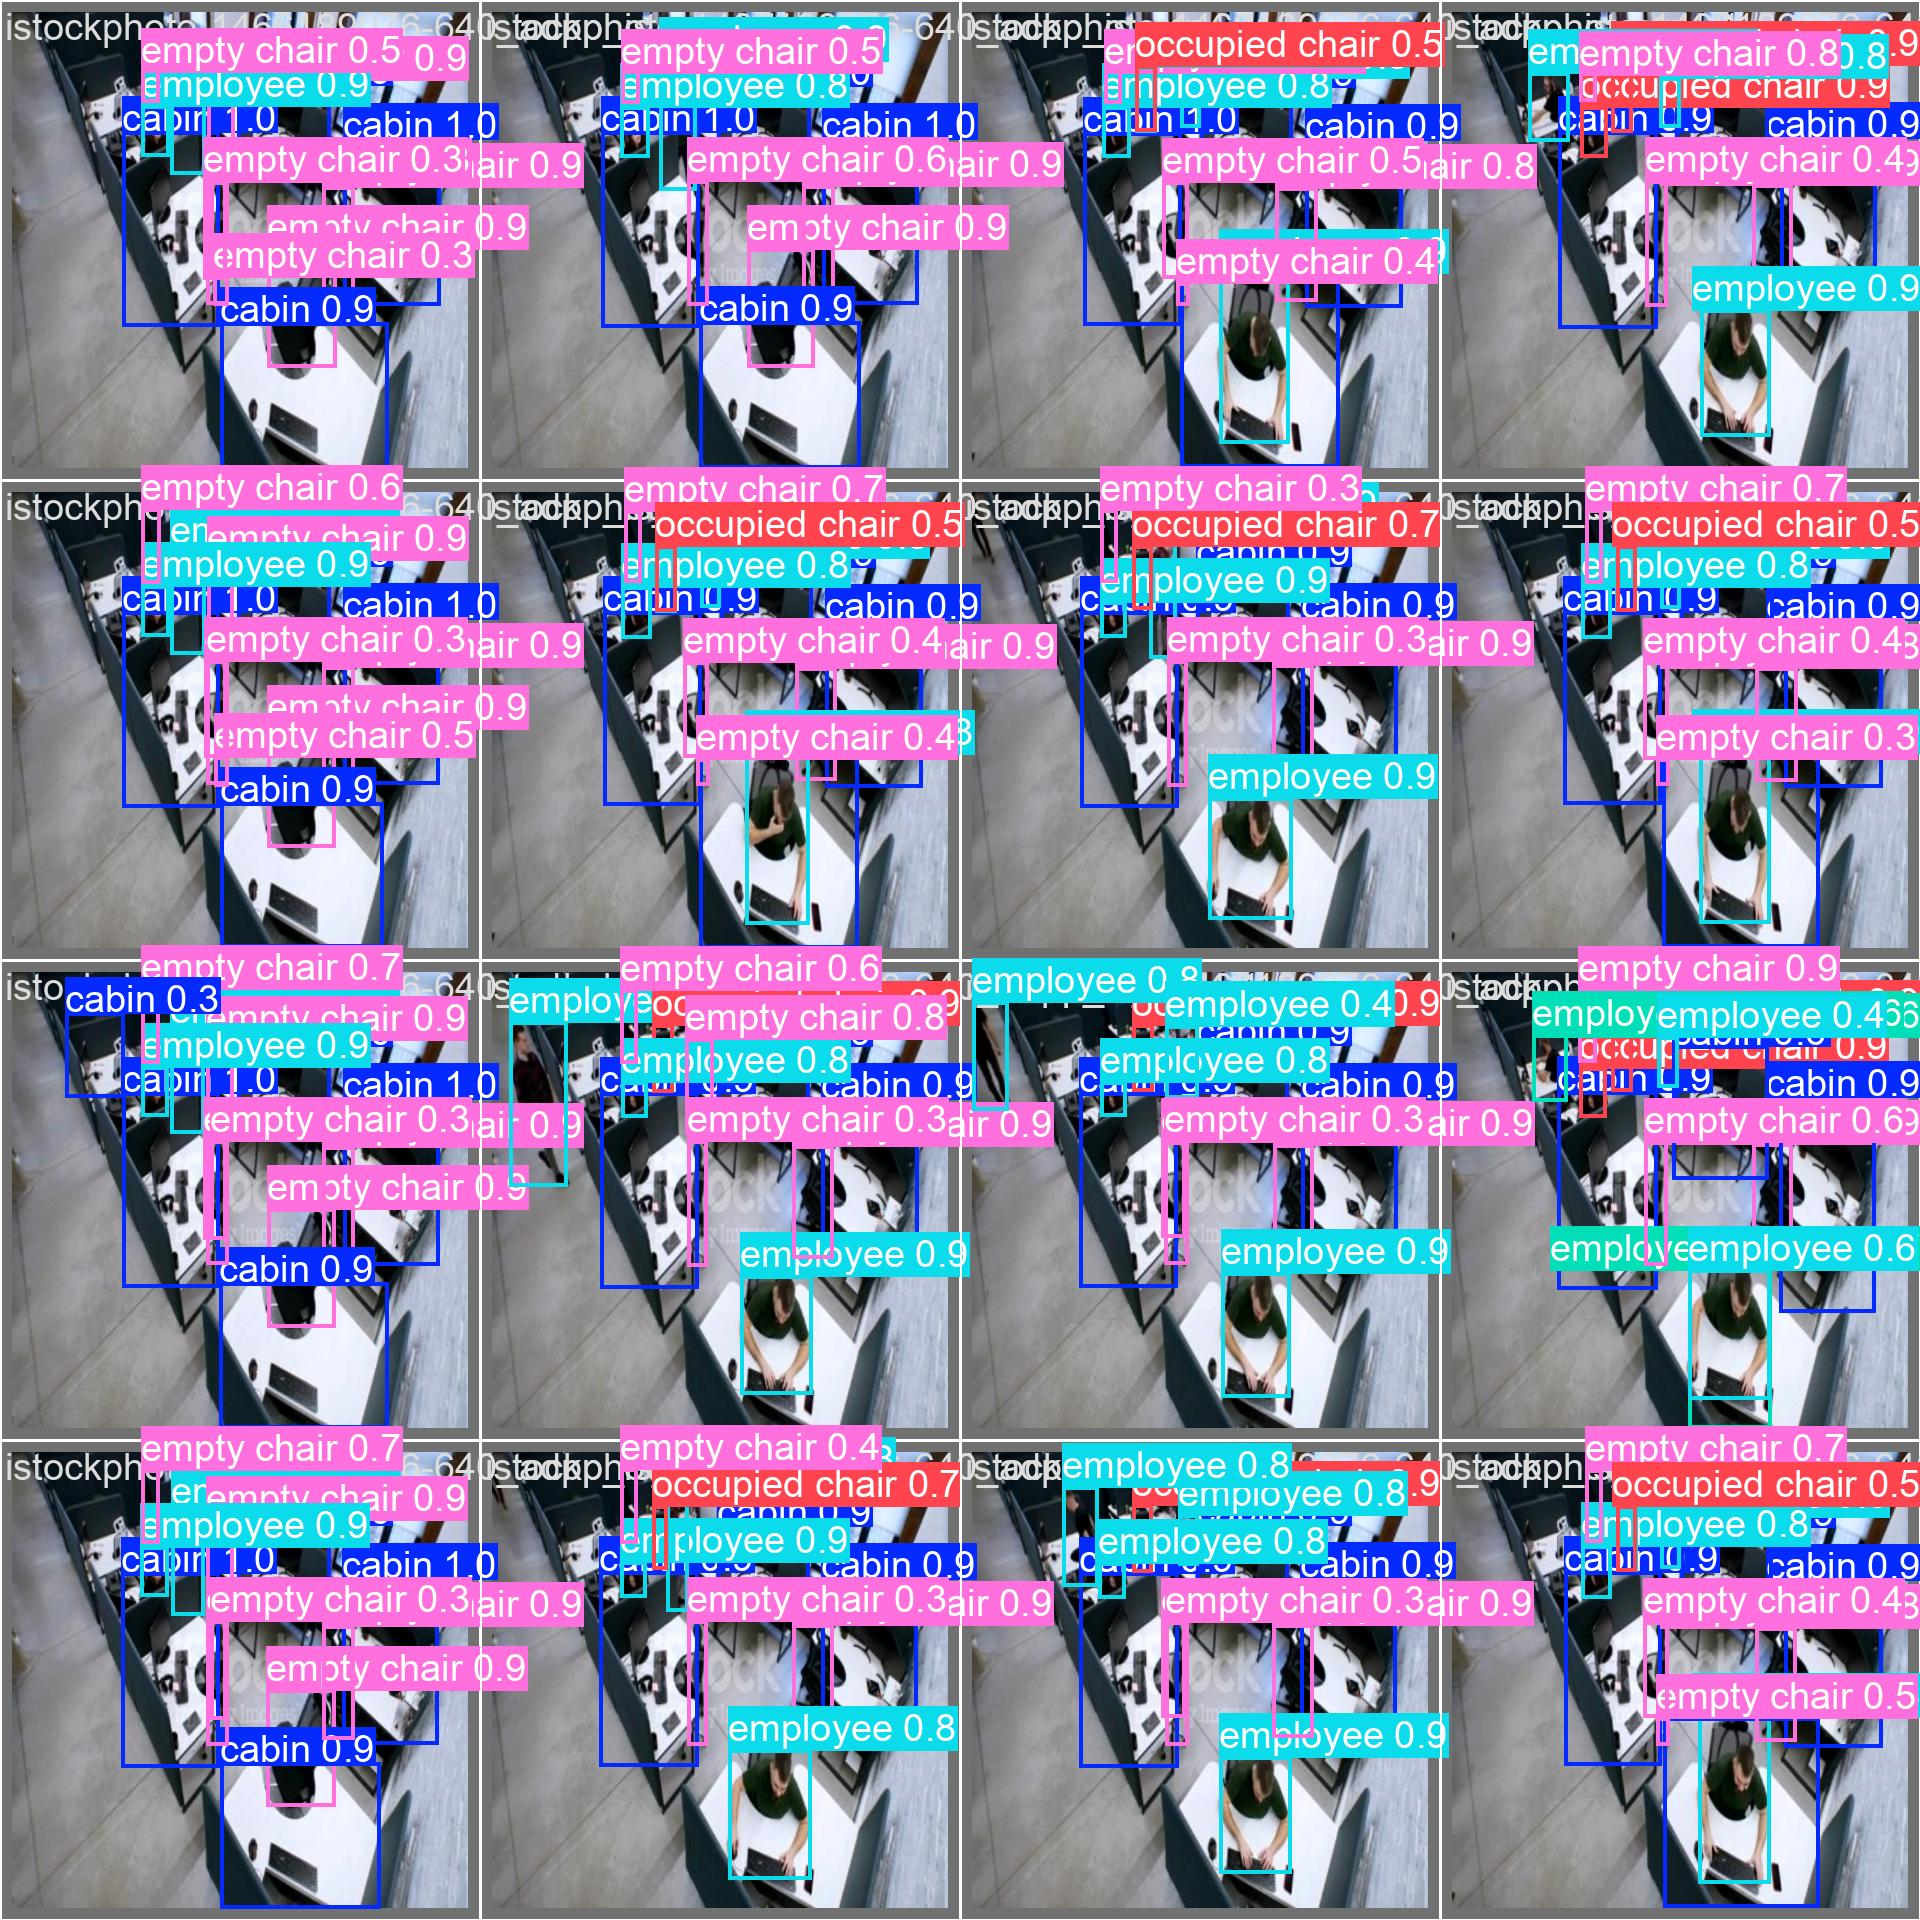

In [18]:
%cd /content
Image(filename=f'/content/datasets/employee-surveillance-6/runs/detect/train5/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [20]:
%cd /content

!yolo task=detect mode=val model=/content/datasets/employee-surveillance-6/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/employee-surveillance-6/valid/labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100% 34/34 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 331, len(boxes) = 346. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.45it/s]
                   all         34        346      0.797      0.906      0.909       0.82
                 cabin         33        107      0.862      0.937      0.902      0.826
              employee         23         59      0.768      0.949      0.867      0.757
  employee not worki

## Inference with Custom Model

In [21]:
%cd /content
!yolo task=detect mode=predict model=/content/datasets/employee-surveillance-6/runs/detect/train5/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs

image 1/19 /content/datasets/employee-surveillance-6/test/images/istockphoto-1466189076-640_adpp_is_mp4-105_jpg.rf.acb1a1339eada8dcc6935ee88702af13.jpg: 608x608 4 cabins, 2 employees, 6 empty chairs, 15.8ms
image 2/19 /content/datasets/employee-surveillance-6/test/images/istockphoto-1466189076-640_adpp_is_mp4-123_jpg.rf.0af89e09097ea3f3e178c424399f6846.jpg: 608x608 4 cabins, 2 employees, 5 empty chairs, 15.9ms
image 3/19 /content/datasets/employee-surveillance-6/test/images/istockphoto-1466189076-640_adpp_is_mp4-135_jpg.rf.d81fb0761d9b2ecd8b867f03f1dd201a.jpg: 608x608 4 cabins, 2 employees, 4 empty chairs, 2 occupied chairs, 15.8ms
image 4/19 /content/datasets/employee-surveillance-6/test/images/istockphoto-1466189076-640_adpp_is_mp4-136_jpg.rf.885c31ff2b3602f9e5c1adcf2d3b631c.jpg: 608x608 3 cabins, 3 employees, 3

**NOTE:** Let's take a look at few results.

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/datasets/employee-surveillance-6/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"/content/datasets/employee-surveillance-6/runs/detect/train2/")